In [48]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [49]:
import numpy as np
import pandas as pd
from pandas.plotting import table

In [50]:
import datetime as dt
from dateutil.parser import parse

# Reflect Tables into SQLAlchemy ORM

In [51]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [52]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [53]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [54]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [55]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [56]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [57]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [58]:
# Using the inspector to print the column names within the 'Measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [59]:
# Using the inspector to print the column names within the 'Station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


#  Exploratory Climate Analysis

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [61]:
# Query All Records in the the Database
results = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs ).all()
  
#for row in results:
#    print(row)

In [62]:
# Calculate the date 1 year ago from the last data point in the database
max_date = session.query(Measurement.id, Measurement.station, func.max(Measurement.date), Measurement.prcp,\
                         Measurement.tobs ).all()
max_date[0][2]
max_dt=parse(max_date[0][2])
date=max_dt-dt.timedelta(days=366)
print(date)

2016-08-22 00:00:00


In [63]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

results_12_months = session.query(Measurement.id, Measurement.station, Measurement.date, func.sum(Measurement.prcp), \
    Measurement.tobs).\
    filter(Measurement.date > date).filter(Measurement.prcp != None).\
    group_by(Measurement.date).\
    order_by(Measurement.date.desc()).all()

for row in results_12_months:
    print(row)

(2724, 'USC00519397', '2017-08-23', 0.53, 81.0)
(2723, 'USC00519397', '2017-08-22', 0.5, 82.0)
(2722, 'USC00519397', '2017-08-21', 0.5800000000000001, 81.0)
(2721, 'USC00519397', '2017-08-20', 0.01, 81.0)
(2720, 'USC00519397', '2017-08-19', 0.09, 79.0)
(2719, 'USC00519397', '2017-08-18', 0.06, 80.0)
(7630, 'USC00514830', '2017-08-17', 0.19, 78.0)
(7629, 'USC00514830', '2017-08-16', 0.61, 82.0)
(2718, 'USC00519397', '2017-08-15', 0.8200000000000001, 78.0)
(2717, 'USC00519397', '2017-08-14', 0.31, 79.0)
(2716, 'USC00519397', '2017-08-13', 0.0, 81.0)
(2715, 'USC00519397', '2017-08-12', 0.14, 80.0)
(2714, 'USC00519397', '2017-08-11', 0.0, 78.0)
(2713, 'USC00519397', '2017-08-10', 0.07, 81.0)
(2712, 'USC00519397', '2017-08-09', 0.15, 80.0)
(2711, 'USC00519397', '2017-08-08', 0.44000000000000006, 80.0)
(2710, 'USC00519397', '2017-08-07', 0.05, 80.0)
(2709, 'USC00519397', '2017-08-06', 0.0, 80.0)
(2708, 'USC00519397', '2017-08-05', 0.06, 81.0)
(2707, 'USC00519397', '2017-08-04', 0.06, 80.0)
(

(2411, 'USC00519397', '2016-10-09', 0.0, 76.0)
(2410, 'USC00519397', '2016-10-08', 0.04, 78.0)
(2409, 'USC00519397', '2016-10-07', 0.01, 79.0)
(2408, 'USC00519397', '2016-10-06', 0.16, 80.0)
(2407, 'USC00519397', '2016-10-05', 0.8200000000000001, 80.0)
(2406, 'USC00519397', '2016-10-04', 3.4899999999999998, 79.0)
(2405, 'USC00519397', '2016-10-03', 0.6900000000000001, 79.0)
(2404, 'USC00519397', '2016-10-02', 0.72, 79.0)
(2403, 'USC00519397', '2016-10-01', 1.4500000000000002, 80.0)
(2402, 'USC00519397', '2016-09-30', 1.15, 80.0)
(2401, 'USC00519397', '2016-09-29', 2.99, 80.0)
(2400, 'USC00519397', '2016-09-28', 0.13, 79.0)
(2399, 'USC00519397', '2016-09-27', 1.3599999999999999, 80.0)
(2398, 'USC00519397', '2016-09-26', 1.67, 80.0)
(2397, 'USC00519397', '2016-09-25', 0.09, 78.0)
(2396, 'USC00519397', '2016-09-24', 0.28, 81.0)
(2395, 'USC00519397', '2016-09-23', 1.57, 82.0)
(2394, 'USC00519397', '2016-09-22', 1.44, 76.0)
(2393, 'USC00519397', '2016-09-21', 1.17, 78.0)
(2392, 'USC00519397

In [64]:
# Perform a query to retrieve the data and precipitation scores
# Unpack the date and `precp` from results and save into separate lists
date_12 = [data[2] for data in results_12_months[:]]
prcp_12 = [float(data[3]) for data in results_12_months[:]]

In [65]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df_prcp = pd.DataFrame({'precipitation':prcp_12, 'date':date_12})

df_prcp.set_index('date', inplace=True )
# Sort the dataframe by date
df_prcp.sort_values(by=['date'])
df_prcp.head()

,precipitation
date,
2017-08-23,0.53
2017-08-22,0.50
2017-08-21,0.58
2017-08-20,0.01
2017-08-19,0.09


# Precipitation Analysis

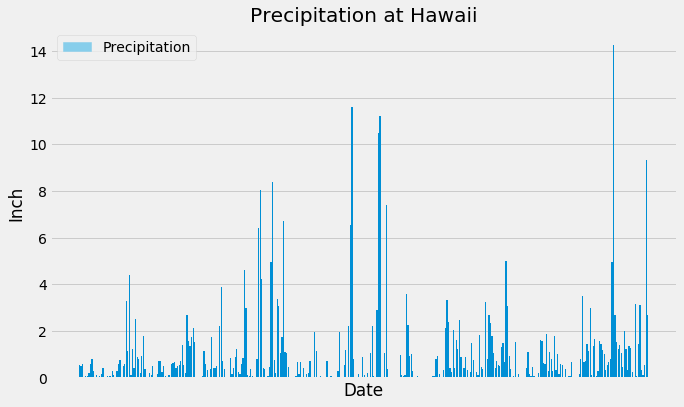

In [66]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_prcp.index, df_prcp.precipitation)
ax.get_xaxis().set_ticks([])
ax.set(xlabel='Date', ylabel='Inch',title = 'Precipitation at Hawaii')
prcp_patch = mpatches.Patch(color='skyblue', label='Precipitation')
plt.legend(handles=[prcp_patch])
plt.savefig("Images/prcp.png")

# Station Analysis

In [67]:
#Use Pandas to print the summary statistics for the precipitation data.
results = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.date > date).filter(Measurement.prcp != None).\
    order_by(Measurement.date.desc()).all()

date_all = [data[2] for data in results[:]]
prcp_all = [float(data[3]) for data in results[:]]

In [68]:
df_all = pd.DataFrame({'precipitation':prcp_all}, index=date_all)

In [69]:
summary=df_all.describe()
summary

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


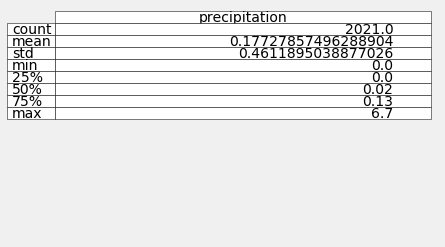

In [70]:
plot = plt.subplot(111, frame_on=False)
#remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False)
#create the table plot and position it in the upper left corner
table(plot, summary,loc='upper right')

#save the plot as a png file
plt.savefig('Images/desc_plot.png')

In [71]:
# Design a query to show how many stations are available in this dataset?

In [72]:
session.query((Measurement.station)).\
    group_by(Measurement.station).\
    order_by(Measurement.station.desc()).count()

9

In [73]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station) ).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [74]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

# Find Most active station
sta_list=session.query(Measurement.station,func.count(Measurement.station) ).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
top_sta=sta_list[0][0]
print(top_sta)

USC00519281


In [75]:
session.query( func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == top_sta).filter(Measurement.tobs != None).\
    order_by(Measurement.date.desc()).all()

[(54.0, 85.0, 71.66378066378067)]

In [76]:
# Choose the station with the highest number of temperature observations.
sta_list=session.query(Measurement.station,func.count(Measurement.station) ).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
top_sta=sta_list[0][0]
print(top_sta)

USC00519281


In [77]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results_tobs = session.query( Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.date > date).filter(Measurement.tobs != None).\
    filter(Measurement.station == top_sta).\
    order_by(Measurement.date.desc()).all()
results_tobs

[(14959, 'USC00519281', '2017-08-18', 0.06, 79.0),
 (14958, 'USC00519281', '2017-08-17', 0.01, 76.0),
 (14957, 'USC00519281', '2017-08-16', 0.12, 76.0),
 (14956, 'USC00519281', '2017-08-15', 0.32, 77.0),
 (14955, 'USC00519281', '2017-08-14', 0.0, 77.0),
 (14954, 'USC00519281', '2017-08-13', 0.0, 77.0),
 (14953, 'USC00519281', '2017-08-06', 0.0, 83.0),
 (14952, 'USC00519281', '2017-08-05', 0.06, 82.0),
 (14951, 'USC00519281', '2017-08-04', 0.0, 77.0),
 (14950, 'USC00519281', '2017-07-31', 0.0, 76.0),
 (14949, 'USC00519281', '2017-07-30', 0.0, 81.0),
 (14948, 'USC00519281', '2017-07-29', 0.23, 82.0),
 (14947, 'USC00519281', '2017-07-28', 0.09, 81.0),
 (14946, 'USC00519281', '2017-07-27', 0.01, 76.0),
 (14945, 'USC00519281', '2017-07-26', 0.12, 75.0),
 (14944, 'USC00519281', '2017-07-25', 0.11, 77.0),
 (14943, 'USC00519281', '2017-07-24', 0.61, 75.0),
 (14942, 'USC00519281', '2017-07-23', 0.2, 82.0),
 (14941, 'USC00519281', '2017-07-22', 0.2, 77.0),
 (14940, 'USC00519281', '2017-07-21', 0

In [78]:
tdate_12 = [(data[2]) for data in results_tobs[:]]
tobs_12 = [float(data[4]) for data in results_tobs[:]]
df_tbos = pd.DataFrame({'tobs':tobs_12}, index=tdate_12)
df_tbos.head()

,tobs
2017-08-18,79.0
2017-08-17,76.0
2017-08-16,76.0
2017-08-15,77.0
2017-08-14,77.0


In [79]:
#plt.close()
#df_tbos.hist()
#plt.tight_layout()
#plt.show()
#plt.savefig("Images/trip_t.png")

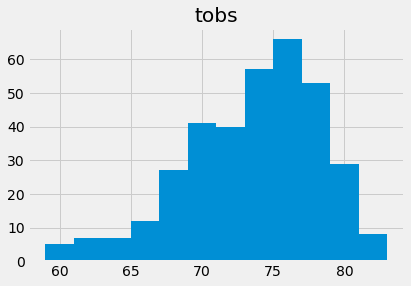

In [80]:
plt.hist(list(np.ravel(tobs_12)), bins =12)
plt.title('tobs')
plt.savefig("Images/tobs_sta.png")

In [81]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [82]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

In [83]:
print(calc_temps('2016-02-28', '2016-03-05'))

[(62.0, 69.88636363636364, 80.0)]


In [84]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

In [85]:
calc_temps('2016-08-22', '2017-08-23')

[(58.0, 74.59901654000895, 87.0)]

In [86]:
#date = dt.datetime(2016, 8, 23)

results=session.query((func.max(Measurement.tobs)-func.min(Measurement.tobs)), func.avg(Measurement.tobs) ).\
        filter(Measurement.date >= date).all()
ptps = list(np.ravel(results))

ptps

[29.0, 74.59058295964125]

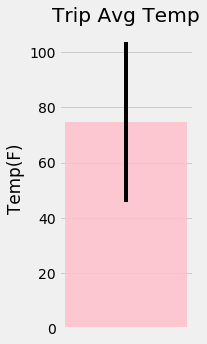

<Figure size 432x288 with 0 Axes>

In [87]:
avg_temp=ptps[1]
std_temp=ptps[0]

fig, ax = plt.subplots(figsize=(3, 5))

index = 1
#bar_width = 0.1

opacity = 0.85
#error_config = {'ecolor': '0.3'}

ax.bar(index, avg_temp, alpha=opacity, color='pink', yerr=std_temp)

ax.set_title('Trip Avg Temp')
ax.set_ylabel('Temp(F)')
ax.set_xticks([])
fig.tight_layout()
plt.show()
plt.savefig("Images/trip_avgtemp.png")

In [88]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

In [89]:
# Using the inspector to print the column names within the 'Station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])    

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [90]:
def calc_pcps(start_date, end_date):
       
    return session.query(Measurement.station, Station.name, Station.latitude, Station.longitude,Station.elevation, (Measurement.prcp)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).filter(Measurement.prcp != None).\
        group_by(Measurement.station).\
        order_by(Measurement.prcp.desc()).all()
print(calc_pcps('2017-02-28', '2017-03-05'))

[('USC00517948', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 2.4), ('USC00516128', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.58), ('USC00513117', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.16), ('USC00514830', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.04), ('USC00519281', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.04), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0)]


## Optional Challenge Assignment

In [91]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [92]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [93]:
start_date = dt.datetime(2018, 4, 14)
end_date = dt.datetime(2018, 4, 22)
step = dt.timedelta(days=1)

trip_date = []

#Create a sequence days of my trip
while start_date <= end_date:
    trip_date.append(start_date.strftime('%Y-%m-%d'))
    start_date += step
trip_date

['2018-04-14',
 '2018-04-15',
 '2018-04-16',
 '2018-04-17',
 '2018-04-18',
 '2018-04-19',
 '2018-04-20',
 '2018-04-21',
 '2018-04-22']

In [94]:
trip_dt = [(parse(trip_date[x])- dt.timedelta(days=365)).strftime('%m-%d') for x in range(len(trip_date))]
len(trip_dt)
trip_dt

['04-14',
 '04-15',
 '04-16',
 '04-17',
 '04-18',
 '04-19',
 '04-20',
 '04-21',
 '04-22']

In [95]:
normals_data=[]
for x in trip_dt:
    normals_data=(daily_normals(x))
normals_data

[(65.0, 72.92727272727272, 84.0)]

In [96]:
normals_data=[np.ravel(daily_normals(x)) for x in trip_dt]

In [97]:
normals_data

[array([65.  , 72.75, 81.  ]),
 array([61.        , 71.79310345, 79.        ]),
 array([62.        , 71.55357143, 81.        ]),
 array([65.        , 71.93103448, 77.        ]),
 array([67.        , 72.49152542, 77.        ]),
 array([65.        , 72.42105263, 83.        ]),
 array([64.        , 72.73684211, 80.        ]),
 array([66.        , 72.32142857, 78.        ]),
 array([65.        , 72.92727273, 84.        ])]

In [98]:
df_trip=pd.DataFrame(normals_data, columns = ["tmin","tavg","tmax"],index = trip_date)
df_trip

,tmin,tavg,tmax
2018-04-14,65.0,72.750000,81.0
2018-04-15,61.0,71.793103,79.0
2018-04-16,62.0,71.553571,81.0
2018-04-17,65.0,71.931034,77.0
2018-04-18,67.0,72.491525,77.0
2018-04-19,65.0,72.421053,83.0
2018-04-20,64.0,72.736842,80.0
2018-04-21,66.0,72.321429,78.0
2018-04-22,65.0,72.927273,84.0


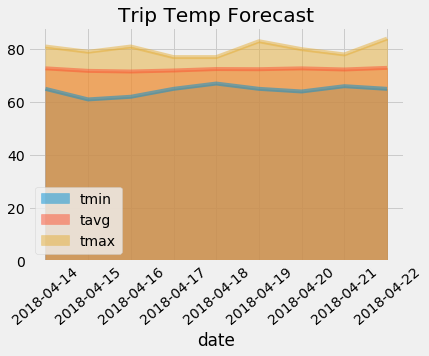

In [99]:
# Plot the daily normals as an area plot with `stacked=False`

df_trip.plot(kind = "area",stacked=False,grid = True, title="Trip Temp Forecast")
plt.xticks(np.arange(9),trip_date,rotation = 40)
plt.xlabel('date')
plt.savefig("Images/trip_temp.png")